Referências:

https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
https://github.com/erykml/isolation_forest_example/blob/master/isolation_forest_example.ipynb


In [0]:
!apt-get update

!pip install -U -q PyDrive
!pip install matplotlib
!pip install numpy
!pip install pandas --upgrade
!pip install sklearn

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest

In [4]:
# Generating data ----

rng = np.random.RandomState(42)

# Dados de Treinamento
X_train = 0.2 * rng.randn(500, 2)
X_train = np.r_[X_train + 2, X_train -2]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Dados de Teste (normais)
X_test = 0.2 * rng.randn(100, 2)
X_test = np.r_[X_test + 2, X_test -2]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Outliers Gerados
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])


,x1,x2
0,2.099343,1.972347
1,2.129538,2.304606
2,1.953169,1.953173
3,2.315843,2.153487
4,1.906105,2.108512
5,1.907316,1.906854
6,2.048392,1.617344
7,1.655016,1.887542
8,1.797434,2.062849
9,1.818395,1.717539


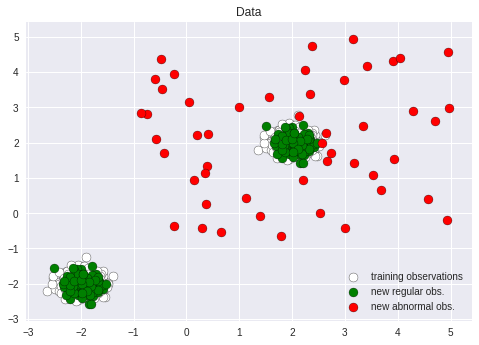

In [0]:
# Plotting generated data ----

plt.title("Data")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green',
                 s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',
                s=20*4, edgecolor='k')

plt.axis('tight')
#plt.xlim((-2, 6))
#plt.ylim((-2, 6))
plt.legend([p1, p2, p3],
           ["training observations",
            "new regular obs.", "new abnormal obs."],
           loc="lower right")

# saving the figure
plt.savefig('generated_data.png', dpi=300)

In [0]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [0]:
# new, 'normal' observations
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

372

In [0]:
# outliers
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

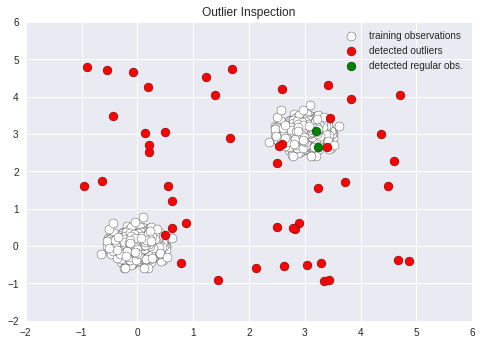

In [0]:
# Inspecting the outliers ----

# adding the predicted label
X_outliers = X_outliers.assign(y = y_pred_outliers)

plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, 'x1'], 
                 X_outliers.loc[X_outliers.y == -1, 'x2'], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, 'x1'], 
                 X_outliers.loc[X_outliers.y == 1, 'x2'], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 6))
plt.ylim((-2, 6))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="best")